<a href="https://colab.research.google.com/github/Aditya-sharma112245/Calories-Burnt-prediction/blob/main/Calories_Burnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


In [2]:
calories=pd.read_csv('/content/calories.csv')
ex=pd.read_csv('/content/exercise.csv')

In [3]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
ex.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
data=pd.concat([calories['Calories'],ex],axis=1)

In [6]:
data.head()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
data.isnull().sum()

,0
Calories,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [8]:
sns.set()

<ipython-input-11-bc069d476120>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Calories'])


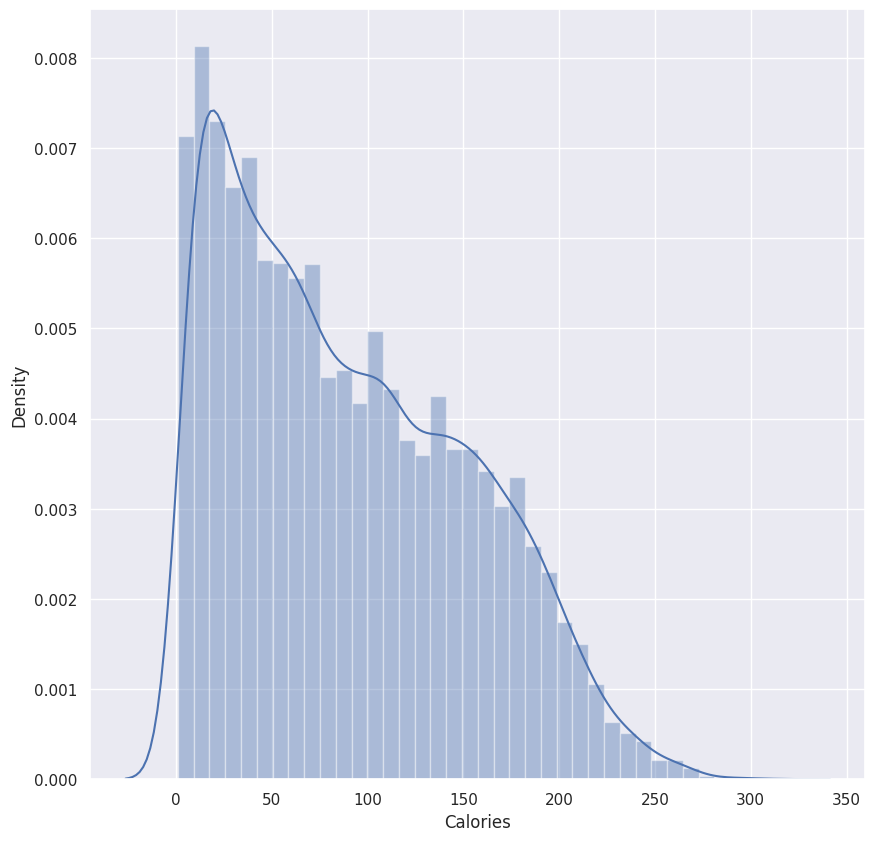

In [11]:
plt.figure(figsize=(10,10))
sns.distplot(data['Calories'])

plt.show()

<ipython-input-12-5721625ae1e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


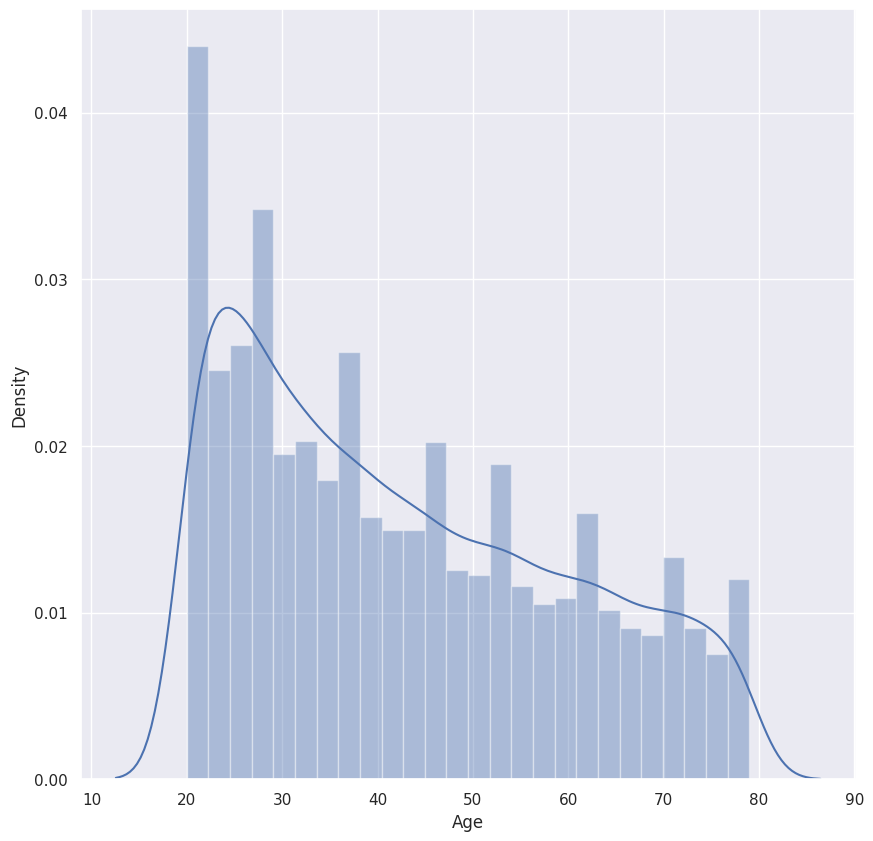

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(data['Age'])

plt.show()

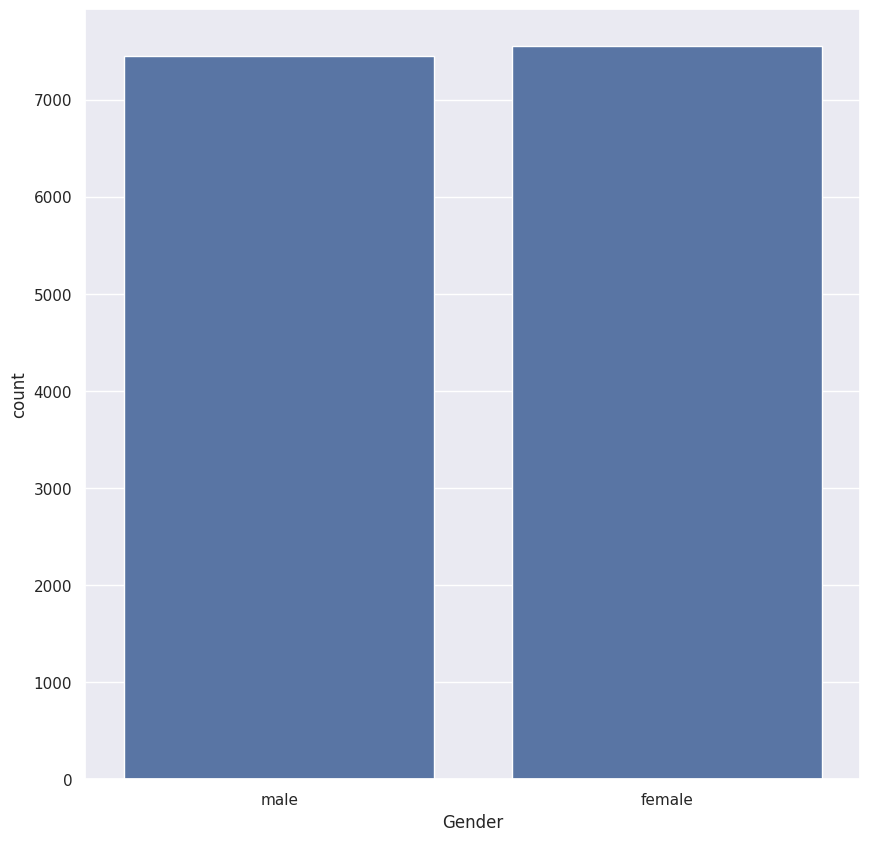

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x=data['Gender'],data=data)

plt.show()

<ipython-input-15-2719247be1bf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


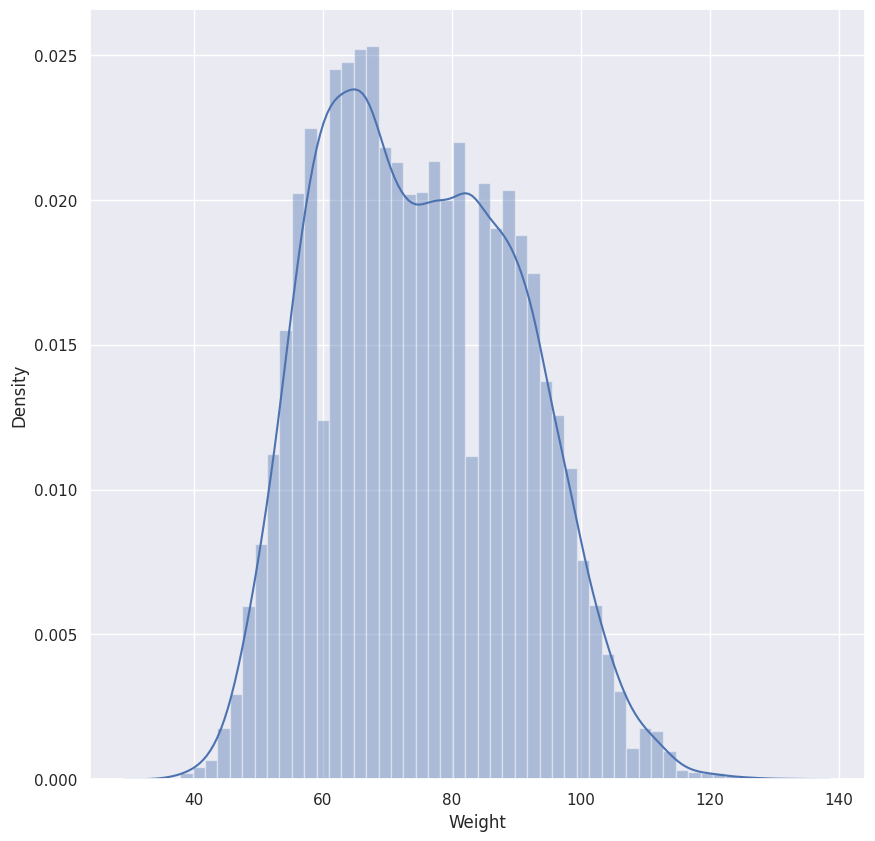

In [15]:
plt.figure(figsize=(10,10))
sns.distplot(data['Weight'])

plt.show()

In [20]:
corre = data.select_dtypes(include=[float, int]).corr()



<Axes: >

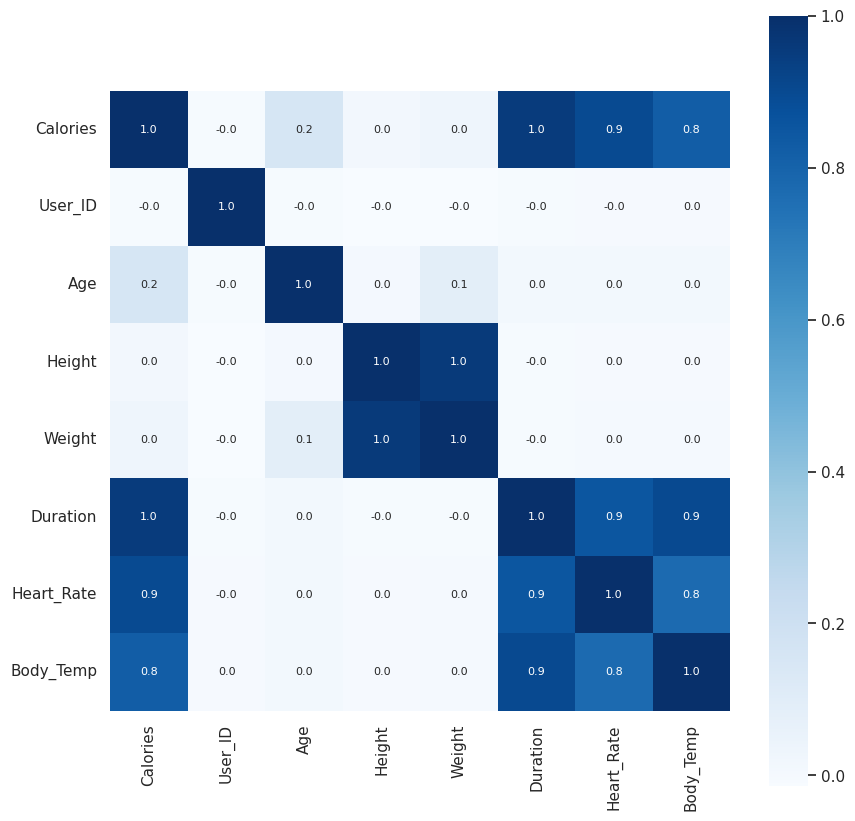

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corre, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [23]:
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [24]:
data.head()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,1,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,0,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,1,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,0,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,0,27,154.0,58.0,10.0,81.0,39.8


In [41]:
x=data.drop(columns=['User_ID','Calories'],axis=1)
y=data['Calories']
data.tail()


,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,45.0,15644082,0,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,17212577,0,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,17271188,0,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,18643037,1,78,193.0,97.0,2.0,84.0,38.3
14999,98.0,11751526,1,63,173.0,79.0,18.0,92.0,40.5


In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [28]:
model=XGBRegressor()

In [29]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
print(metrics.mean_absolute_error(y_test,model.predict(x_test)))

1.4833678883314132


In [31]:
print(metrics.r2_score(y_test,model.predict(x_test)))

0.998800624504713


In [32]:
print(metrics.r2_score(y_train,model.predict(x_train)))

0.9995691477017405


In [34]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Average R² score: {cv_scores.mean()}')

Cross-validation R² scores: [0.99862124 0.99861282 0.99867514 0.99848757 0.99873669]
Average R² score: 0.9986266919022148


In [42]:
sample_input = [[0,43,159.0,58.0,16.0,90.0,40.1]]
predicted_calories = model.predict(sample_input)
print(f"Predicted Calories: {predicted_calories}")


Predicted Calories: [73.536575]
